## Многомерный статистический анализ. Линейная регрессия

### Задание № 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [11]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [12]:
#  Считаем, что связь между x и y есть парная регрессия иописывается линейной функцией: y = a + bx
# Найдем коэффициенты регрессии a и b:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [13]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

### Уравнение регрессии имеет вид (коэффициенты округлены до сотых):   y = 444.17 + 2.62 * x

In [14]:
# Найдем коэффициент корреляции r с помощью коэффициента b и средних квадратического отклонения, посчитанного для массивов x и y:
r = b * np.std(x) / np.std(y)
r

0.8874900920739162

In [8]:
# Найдем коэффициент детерминации R^2:
R2 = r**2
R2

0.7876386635293682

In [15]:
# Посчитаем значения, предсказанные моделью
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [16]:
# Качество модели найдем с помощью средней ошибки аппроксимации A:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

#### Так как A равна 11.4%, что  превышает 8-10 %, модель плохо описывает эмпирические данные.

In [20]:
n = 10


In [21]:
# Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера. 
# Найдем фактическое значение F-критерия (F_факт):
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

29.671640859664432

#### При 5 % уровне значимости и степенях свободы k1 = 1 и k2 = 10 - 2 = 8 табличное значение критерия: F_кр = 5.32. 
### Так как F_факт = 29.67 > F_кр = 5.32, уравнение регрессии статистически значимо.

In [23]:
# Для оценки статистической значимости параметров регрессии воспользуемся t-статистикой Стьюдента. 
# При df = n - 2 = 10 - 2 = 8 и alpha = 0.05  
t_cr = 2.306

In [24]:
# Определим стандартную ошибку S_ост (переменная s_residual) и случайные ошибки m_a, m_b:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 89.93340731602925
m_a = 56.466497550681524
m_b = 0.48108279568516


In [25]:
# Вычислим наблюдаемые значения критерия t_a и t_b:
t_a = a / m_a
t_a

7.866210524668864

In [26]:
t_b = b / m_b
t_b

5.447168150485579

In [27]:
t_a > t_cr

True

In [28]:
t_b > t_cr

True

#### Фактические значения t-статистики больше табличного значения: то есть они статистически значимы.

In [29]:
# Рассчитаем доверительные интервалы для параметров регрессии a и b. Для этого определим предельную ошибку для каждого показателя (Delta_a и Delta_b),
# используя значение t_cr = 2.306:
delta_a = t_cr * m_a
delta_a

130.2117433518716

In [30]:
delta_b = t_cr * m_b
delta_b

1.109376926849979

In [31]:
# Найдем границы доверительных интервалов gamma a_min, gamma a_max, gamma b_min, \gamma b_max:
gamma_a_min = a - delta_a
gamma_a_min

313.965613972488

In [32]:
gamma_a_max = a + delta_a
gamma_a_max

574.3891006762312

In [33]:
gamma_b_min = b - delta_b
gamma_b_min

1.511161955552786

In [34]:
gamma_b_max = b + delta_b
gamma_b_max

3.729915809252744

#### Приходим к выводу о том, что с вероятностью p = 1 - alpha = 0.95 параметры a и b, находясь в указанных границах, являются статистически значимыми и отличны от нуля. 

In [35]:
# Поместим исходные и предсказанные данные в датафрейм:
df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,35,401,535.896218
1,45,574,562.101607
2,190,874,942.079745
3,200,919,968.285134
4,40,459,548.998913
5,70,739,627.615079
6,54,653,585.686457
7,150,902,837.258190
8,120,746,758.642023
9,110,832,732.436634


In [36]:
df = df.sort_values('x')
df

,x,y,y_pred
0,35,401,535.896218
4,40,459,548.998913
1,45,574,562.101607
6,54,653,585.686457
5,70,739,627.615079
9,110,832,732.436634
8,120,746,758.642023
7,150,902,837.258190
2,190,874,942.079745
3,200,919,968.285134


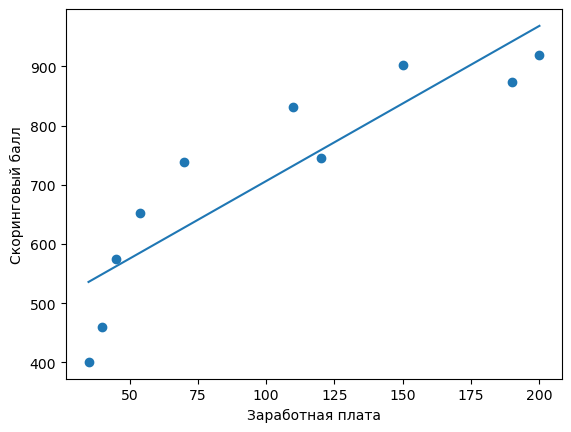

In [37]:
# Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.show()

## Проведем расчет без использования intercept в матричном виде

In [38]:
zp = x.reshape((1,-1 ))
zp

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [39]:
ks = y.reshape((1,-1 ))
ks

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [40]:
(np.linalg.inv(zp @ zp.T) @ zp) @ ks.T

array([[5.88982042]])

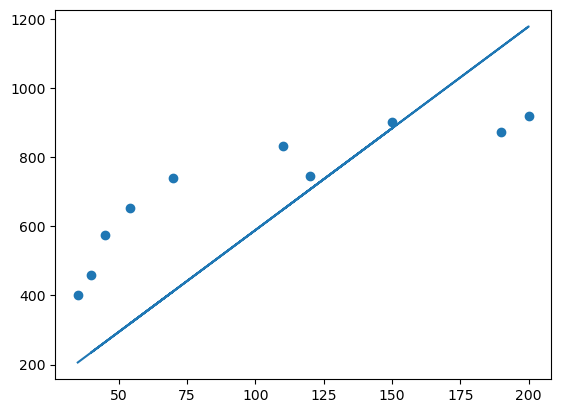

In [41]:
plt.scatter(zp[0], ks[0])
plt.plot(zp[0], zp[0]*5.88982042)

### Задание 3 В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

### Таблица критических точек распределения Стьюдента применяется, когда неизвесто математическое ожидание и дисперсия генеральной совокупности, но мы знаем что величины распределены нормально.

### Таблица значений функции Лапласа применяется для случаев, когда мы знаем среднее и дисперсию генеральной совокупности и величины распеределены нормально.